In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from music21 import *
from sklearn.feature_extraction.text import TfidfTransformer
import scipy.stats as stats

In [4]:
centones = pd.read_csv("centones.csv")
centones.columns = ['istihlal','iraq arab','maya','sika','gharibat husayn']
relevant_centones = centones[['istihlal','maya','gharibat husayn']]
centones

,istihlal,iraq arab,maya,sika,gharibat husayn
0,"E, F, G","E, F, G","B-, A, G","C, D, E","F, E, D"
1,"G, F, E","C, D, E","E, F, G","A, G","E, F, G"
2,"C, B, A, G","F, E, D, C","B, D, C","E, F, G","A, G"
3,"A, G","A, G","A, G","G, E","G, E"
4,"E, D","D, C","C, E","G, A","B, C, D"
5,"F, E","C, D","B, C","E, F, D, E","B, D, C, B, A"
6,"G, F","A, B, C","G, F, E","E, D, C","E, D, C"
7,"E, F, A, G","F, E","F, G, E, F, E, D, C","G, F, E","C, D, E"
8,"F, E, D",NaN,NaN,NaN,"G, F, E"
9,"A, B, C",NaN,NaN,NaN,"E, F, D, E"


In [5]:
istihlal_sorted = relevant_centones.istihlal.sort_values().reset_index().drop('index',axis=1)
maya_sorted = relevant_centones.maya.sort_values().reset_index().drop('index',axis=1)
gharibat_sorted = relevant_centones['gharibat husayn'].sort_values().reset_index().drop('index',axis=1)

In [6]:
relevant_centones = pd.concat([istihlal_sorted,maya_sorted,gharibat_sorted],axis=1)
relevant_centones

,istihlal,maya,gharibat husayn
0,"A, B, C","A, G","A, G"
1,"A, G","B, C","B, C, D"
2,"C, B, A, G","B, D, C","B, D, C, B, A"
3,"D, C","B-, A, G","C, D, E"
4,"E, D","C, E","E, D, C"
5,"E, F, A, G","E, F, G","E, F, D, E"
6,"E, F, G","F, G, E, F, E, D, C","E, F, G"
7,"F, E","G, F, E","F, E, D"
8,"F, E, D",NaN,"G, E"
9,"F, E, D, C",NaN,"G, F, E"


In [7]:
unique_centones = pd.Series(pd.unique(relevant_centones.values.flatten())).sort_values().reset_index().drop('index',axis=1)[:-1][0]

In [8]:
istihlal_exists = pd.Series([x if x in istihlal_sorted.values else np.nan for x in unique_centones.values])
maya_exists = pd.Series([x if x in maya_sorted.values else np.nan for x in unique_centones.values])
gharibat_exists = pd.Series([x if x in gharibat_sorted.values else np.nan for x in unique_centones.values])

In [194]:
combined_centones = pd.concat([istihlal_exists,maya_exists,gharibat_exists],axis=1)
combined_centones.columns = ['istihlal','maya','gharibat husayn']

In [195]:
combined_centones

,istihlal,maya,gharibat husayn
0,"A, B, C",NaN,NaN
1,"A, G","A, G","A, G"
2,NaN,"B, C",NaN
3,NaN,NaN,"B, C, D"
4,NaN,"B, D, C",NaN
5,NaN,NaN,"B, D, C, B, A"
6,NaN,"B-, A, G",NaN
7,"C, B, A, G",NaN,NaN
8,NaN,NaN,"C, D, E"
9,NaN,"C, E",NaN


In [11]:
centone_streams = {tab : [stream.Stream() for i in range(centones[tab].count())] for tab in centones.columns }
for tab in centones.columns:
    for i in range(centones[tab].count()):
        centone_streams[tab][i].append([note.Note(j) for j in centones[tab][i].split(", ")])
unique_streams = {label : stream.Stream() for label in unique_centones}
for label in unique_centones:
    unique_streams[label].append([note.Note(j) for j in label.split(", ")])

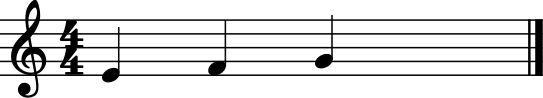

In [12]:
centone_streams['istihlal'][0].show()

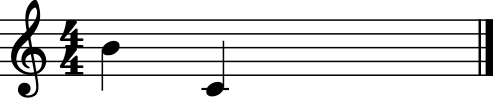

In [13]:
unique_streams['B, C'].show()

In [14]:
metadata = []
for filename in os.listdir('SCORES'):
    f = os.path.join('SCORES', filename)
    try:
        title = pd.read_xml(f)['movement-title'][0]
        if title == 'Mshalia Isbahan_Tetuán':
            if pd.read_xml(f)['credit-words'][3] != 'Tradicional':
                title = pd.read_xml(f)['credit-words'][3]
    except:
            try:
                if pd.read_xml(f)['credit-words'][2] != 'Tradicional':
                    title = pd.read_xml(f)['credit-words'][2]
                else:
                    title = np.nan
            except:
                title = np.nan
    metadata.append([filename,title])
metadata = pd.DataFrame(metadata,columns=['filename','title'])

In [15]:
metadata.describe()

,filename,title
count,159,157
unique,159,89
top,dae13b1f-b7fd-4db3-af3c-11784d51d829.xml,Mshalia Isbahan_Tetuán
freq,1,31


In [16]:
#pd.read_xml(f"SCORES/{metadata[metadata['title']=='Mshalia Isbahan_Tetuán'].filename.values[0]}")

In [17]:
istihlal_files = metadata[metadata['title'].str.lower().str.contains('istihlal').fillna(False)].copy()
maya_files = metadata[metadata['title'].str.lower().str.contains('maya').fillna(False)].copy()
gharibat_files = metadata[metadata['title'].str.lower().str.contains('gharibat').fillna(False)].copy()
istihlal_files['tab'] = 'istihlal'
maya_files['tab'] = 'maya'
gharibat_files['tab'] = 'gharibat husayn'
relevant_files = pd.concat([istihlal_files,maya_files,gharibat_files])

In [18]:
relevant_files['mizan'] = relevant_files.apply(lambda x: x.title.lower().replace(x.tab,''), axis=1)
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('.mp3',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace(' al-',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('_fes',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('raml',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('_rabat',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('_',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('gharibat',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('husain',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('bawakir',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: ''.join(i for i in x if not i.isdigit()))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace(' ',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qaimwanisf','qaim wa nisf'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('mchalia','mshalia'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qouddami','quddam'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qouddam','quddam'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qddam','quddam'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('btaihi','btayhi'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('darj','dary'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('bassit','basit'))
relevant_files = relevant_files.append(relevant_files.iloc[36])
relevant_files = relevant_files.reset_index().drop('index',axis=1)
relevant_files.iloc[36].mizan = 'btayhi'
relevant_files.iloc[43].mizan = 'quddam'

<ipython-input-18-eb4eea3dd9b6>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relevant_files = relevant_files.append(relevant_files.iloc[36])


In [19]:
relevant_files

,filename,title,tab,mizan
0,4342021d-03a1-4727-8c0f-3c23180ef374.xml,Mshalia Istihlal,istihlal,mshalia
1,b3d92934-0946-4f2d-8183-312450d7e45e.xml,Mshalia Istihlal,istihlal,mshalia
2,9727ddbe-eb79-461b-9861-8a60336b17f6.xml,Mshalia Istihlal,istihlal,mshalia
3,a1eac726-208e-4c24-bd57-e34e9e93dcd3.xml,Quddam Istihlal,istihlal,quddam
4,6fe7108c-4e4f-457b-a363-ccf505bdee9a.xml,Btayhi Istihlal,istihlal,btayhi
5,2d2683c4-4b3e-4430-a254-c828427bdcc7.xml,Quddam al-Istihlal,istihlal,quddam
6,44183247-4857-40cd-82bc-b4e9e3f458f1.xml,Mshalia Istihlal,istihlal,mshalia
7,3e5a82a2-d806-45cc-876e-6fa8a2b5a61d.xml,Mshalia Istihlal,istihlal,mshalia
8,023b4a37-1ab4-4593-b03a-850ee0db8350.xml,QaimWaNisfistihlal1982,istihlal,qaim wa nisf
9,f461045b-50bc-4b20-a731-66fbd3a264ae.xml,Qouddam Istihlal,istihlal,quddam


In [20]:
def CountVectorizer():
    fnames = relevant_files.filename.values
    df = pd.DataFrame()
    for f in fnames:
        print('.',end=' ')
        music = converter.parse(f"SCORES/{f}")
        full_piece_stream = music.recurse().notes
        numoccur = pd.DataFrame([len(search.noteNameSearch(full_piece_stream, motif)) for motif in unique_streams.values()])
        df = pd.concat([df,numoccur.T], ignore_index=True)
    return df.values

In [21]:
cv = CountVectorizer()
tfidf = TfidfTransformer().fit_transform(cv).toarray()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [41]:
m =cv[relevant_files['tab']=='maya'].sum(axis=0)
i = cv[relevant_files['tab']=='istihlal'].sum(axis=0)
g = cv[relevant_files['tab']=='gharibat husayn'].sum(axis=0)
grouped = np.array([m,i,g])
grouped.shape

(3, 23)

In [45]:
grouped

array([[ 1684, 10138,  5097,  2043,   620,   132,  1493,  1481,  2257,
         1927,  7874,  6870,  4660,   530,   642,  5098, 10589,  5687,
         3894,   482,  2607, 11526,  6871],
       [ 1173,  3510,  1809,   828,    54,    17,   146,   729,  1654,
          918,  3744,  3905,  2716,   593,    17,  1479,  4240,  2841,
         2127,    25,   655,  4049,  3061],
       [   63,   718,   189,   121,    21,    21,    36,    93,   537,
          212,  1039,   948,   645,    48,   138,   498,   975,   616,
          442,     4,   374,   817,   598]])

In [44]:
#perform the Chi-Square Test of Independence
stats.chi2_contingency(grouped)

(3988.8216566909546,
 0.0,
 44,
 array([[ 1914.92805179,  9421.18369592,  4652.88168749,  1962.14545581,
           455.77910822,   111.48553726,  1098.46044067,  1510.30113126,
          2916.9862926 ,  2004.77227888,  8300.42614779,  7687.91149013,
          5260.14996693,   767.93861255,   522.67043058,  4639.76574193,
         10364.2201817 ,  5996.61031014,  4238.41780779,   335.11240906,
          2384.47890285, 10749.82898117,  6905.54533746],
        [  819.01075568,  4029.4207247 ,  1990.02784643,   839.20554144,
           194.93577918,    47.68213304,   469.80925198,   645.95266107,
          1247.58898674,   857.43694525,  3550.07504612,  3288.10379756,
          2249.75522991,   328.44575168,   223.545059  ,  1984.41818372,
          4432.75547356,  2564.73779108,  1812.76250479,   143.32688224,
          1019.83668071,  4597.67955724,  2953.4874169 ],
        [  186.06119252,   915.39557938,   452.09046608,   190.64900275,
            44.2851126 ,    10.8323297 ,   106.73

In [23]:
def countCentones(tab,mizan,countarray=cv):
    #count the occurences of centones from one tab in a given tab and mizan
    fnames = relevant_files[(relevant_files.tab==tab) & (relevant_files.mizan==mizan)].filename.values
    centones = countarray.T[combined_centones[tab].notnull()].T
    counts = centones[(relevant_files.tab==tab) & (relevant_files.mizan==mizan)]
    df = pd.DataFrame(counts.T)
    df.columns = fnames
    df.index = relevant_centones[tab].dropna().values
    return pd.DataFrame(df.sum(axis=1),columns=['count'])
    

In [24]:
def countAll(tab,mizan,countarray=cv):
    #count the occurences of all possible centones from all tab in a given tab and mizan 
    fnames = relevant_files[(relevant_files.tab==tab) & (relevant_files.mizan==mizan)].filename.values
    counts = countarray[(relevant_files.tab==tab) & (relevant_files.mizan==mizan)]
    df = pd.DataFrame(counts.T)
    df.columns = fnames
    df.index = unique_centones.values
    return pd.DataFrame(df.sum(axis=1),columns=['count'])

In [49]:
def plotDistros(tab,mizan_list,countFunction,countarray=cv):
    #plot distribution of counts with given countFunction for as many mizan as provided
    fig, axs = plt.subplots(1,len(mizan_list),figsize=(6*len(mizan_list), 6))
    for i in range(len(mizan_list)):
        countFunction(tab,mizan_list[i],countarray).apply(lambda x: x/x.max()).plot(kind = 'bar', title=f'{mizan_list[i]} {tab}',legend=False,ax=axs[i])
        plt.xlabel('centone')
        plt.ylabel('normalized centone frequency')
    fig.tight_layout()
    return axs

In [26]:
def plotDifference(mizan,countFunction,countarray=cv):
    #plot different distributions with given countFunction for a single mizan
    tab_list = ['istihlal','maya','gharibat husayn']
    fig, ax = plt.subplots(figsize=(6, 6))
    df = pd.DataFrame()
    for i in range(len(tab_list)):
        df[tab_list[i]]=countFunction(tab_list[i],mizan,countarray).apply(lambda x: x/x.max())
    df.plot(kind = 'bar', stacked=False, title=f'{mizan} all tab',legend=True,ax=ax)
    plt.xlabel('centone')
    plt.ylabel('normalized centone frequency')
    plt.legend(tab_list)
    fig.tight_layout()
    return ax

In [27]:
def plotHighlight(mizan,highlightTab,countarray=cv):
    #plot difference but limited to the centones for just one highlightTab
    tab_list = ['istihlal','maya','gharibat husayn']
    fig, ax = plt.subplots(figsize=(6, 6))
    df = pd.DataFrame()
    for i in range(len(tab_list)):
        try:
            df[tab_list[i]]=countAll(tab_list[i],mizan,countarray).apply(lambda x: x/x.max())
        except:
            continue
    part = combined_centones[highlightTab].notnull()
    part.index = df.index
    df = df[part]
    df.plot(kind = 'bar', stacked=False, title=f'{highlightTab} centones distribution amongst {mizan} of all tab',legend=True,ax=ax)
    plt.xlabel('centone')
    plt.ylabel('normalized centone frequency')
    plt.legend(tab_list)
    fig.tight_layout()
    return ax

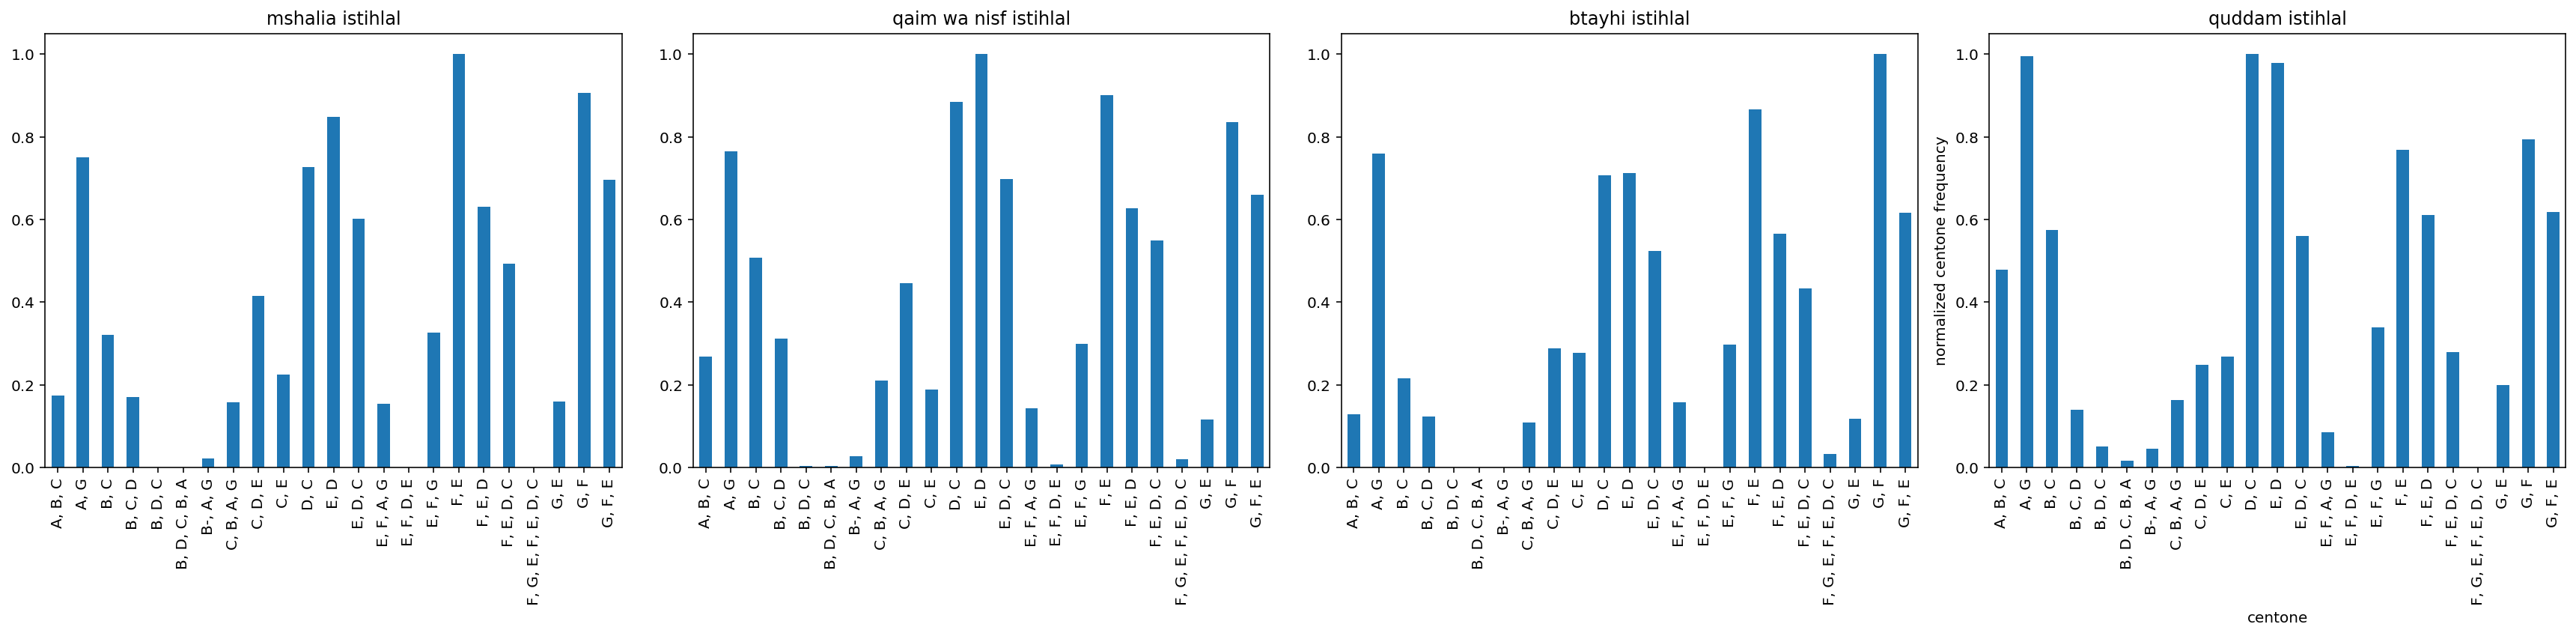

In [55]:
istihlal_axs = plotDistros('istihlal',['mshalia','qaim wa nisf','btayhi','quddam'],countAll,tfidf)

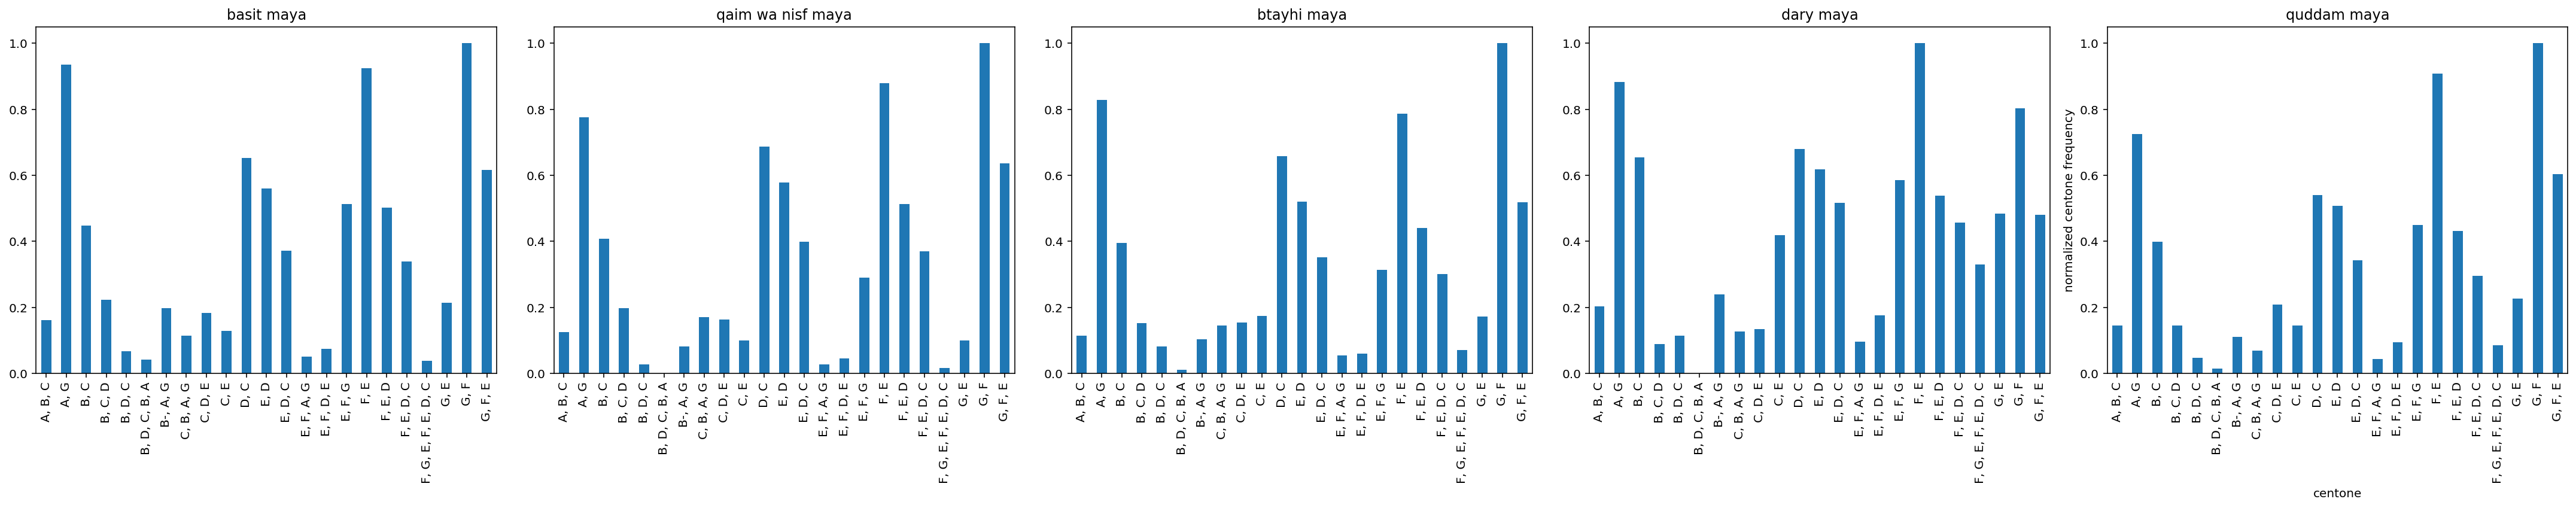

In [56]:
maya_axs = plotDistros('maya',['basit','qaim wa nisf','btayhi','dary','quddam'],countAll,tfidf)

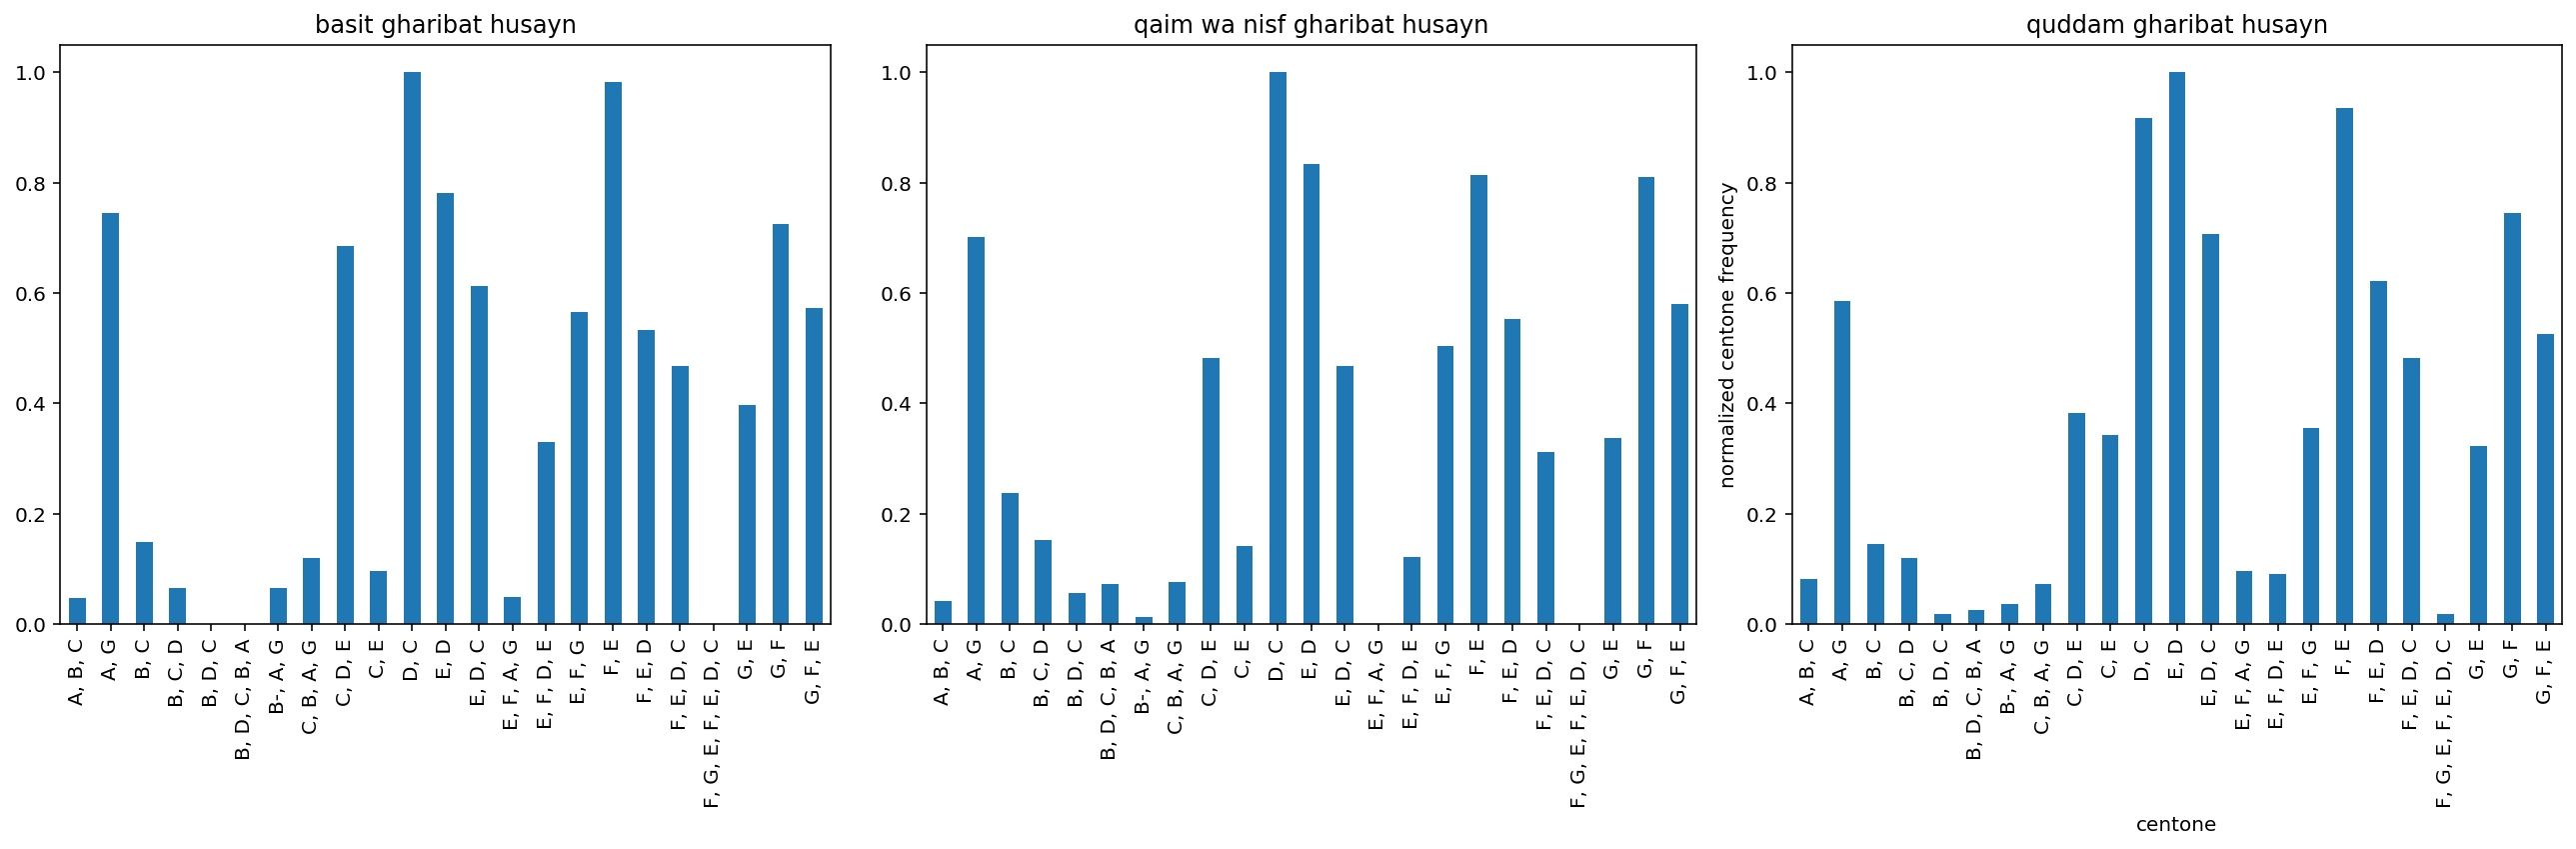

In [57]:
gharibat_axs = plotDistros('gharibat husayn',['basit','qaim wa nisf','quddam'],countAll,tfidf)

<AxesSubplot:title={'center':'maya centones distribution amongst qaim wa nisf of all tab'}, xlabel='centone', ylabel='normalized centone frequency'>

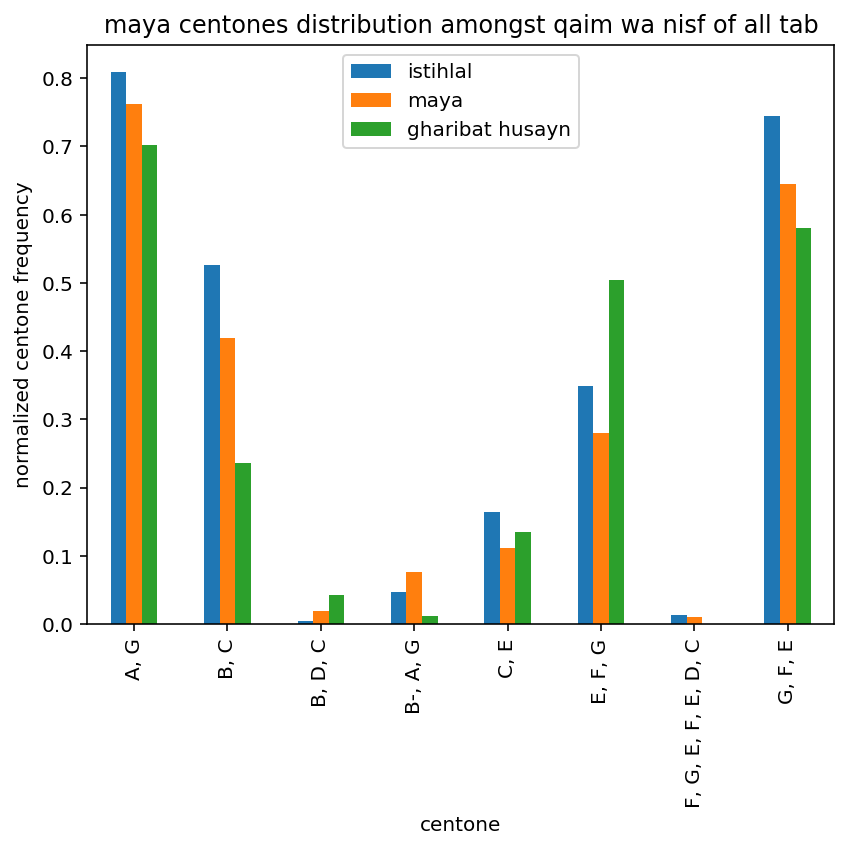

In [58]:
plotHighlight('qaim wa nisf', 'maya',cv)

<AxesSubplot:title={'center':'istihlal centones distribution amongst quddam of all tab'}, xlabel='centone', ylabel='normalized centone frequency'>

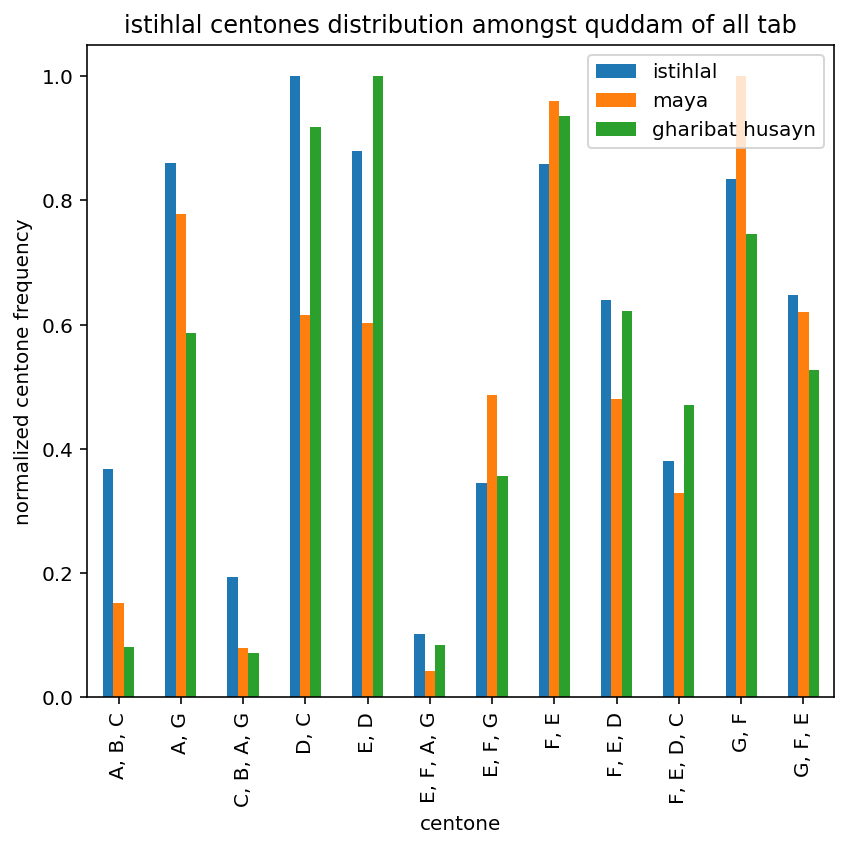

In [59]:
plotHighlight('quddam', 'istihlal',cv)

<AxesSubplot:title={'center':'basit all tab'}, xlabel='centone', ylabel='normalized centone frequency'>

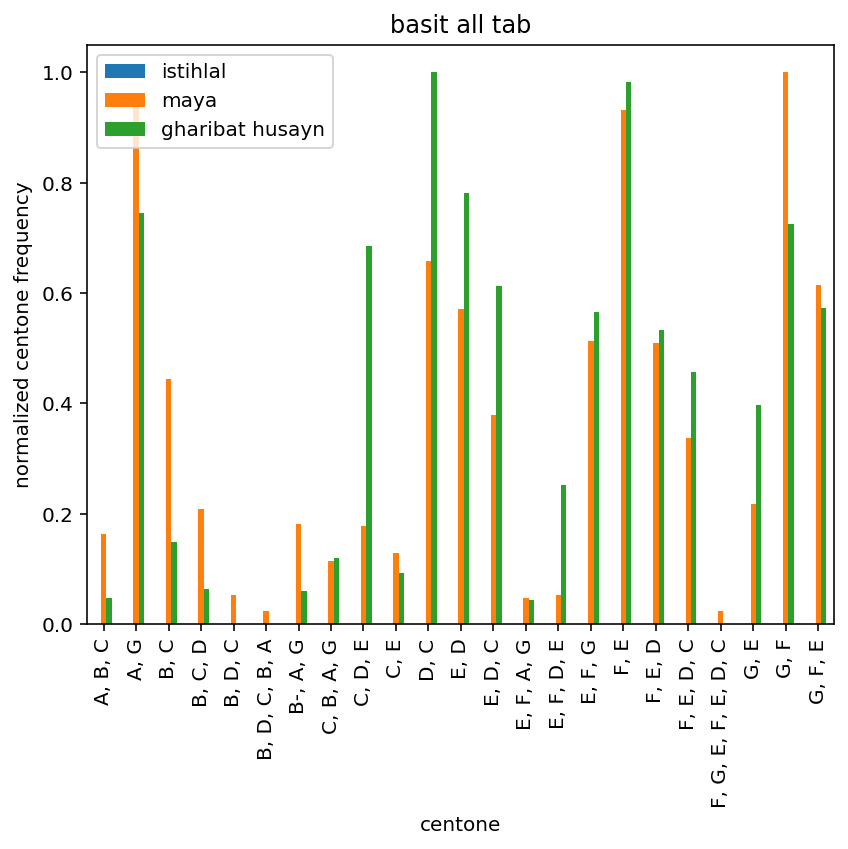

In [60]:
plotDifference('basit',countAll)

In [232]:
def plotDistroSum(countFunction,countarray=cv):
    #plot distribution of counts with given countFunction for as many mizan as provided
    fig, axs = plt.subplots(1,3,figsize=(18, 6))
    counter =0
    for tab in ['istihlal','maya','gharibat husayn']: 
        mizan_list = {'istihlal':['mshalia','qaim wa nisf','btayhi','quddam'], 'maya':['basit','qaim wa nisf','btayhi','dary','quddam'],'gharibat husayn':['basit','qaim wa nisf','quddam']}[tab]
        colors = []
        for v in combined_centones[tab].values:
            if pd.isna(v):
                colors.append('b')
            else:
                colors.append('r')
        df = pd.DataFrame()
        for i in range(len(mizan_list)):
            df = pd.concat([df,countFunction(tab,mizan_list[i],countarray)],axis=1,ignore_index=False)
        df = pd.DataFrame(df.sum(axis=1)).apply(lambda x: x/x.max())
        df.plot(kind = 'bar', title=f'{tab}',xlabel='centone',ylabel='normalized centone frequency',legend=False,ax=axs[counter])
        counter += 1
    fig.tight_layout()
    fig.savefig("distros.png")
    return axs

array([<AxesSubplot:title={'center':'istihlal'}, xlabel='centone', ylabel='normalized centone frequency'>,
       <AxesSubplot:title={'center':'maya'}, xlabel='centone', ylabel='normalized centone frequency'>,
       <AxesSubplot:title={'center':'gharibat husayn'}, xlabel='centone', ylabel='normalized centone frequency'>],
      dtype=object)

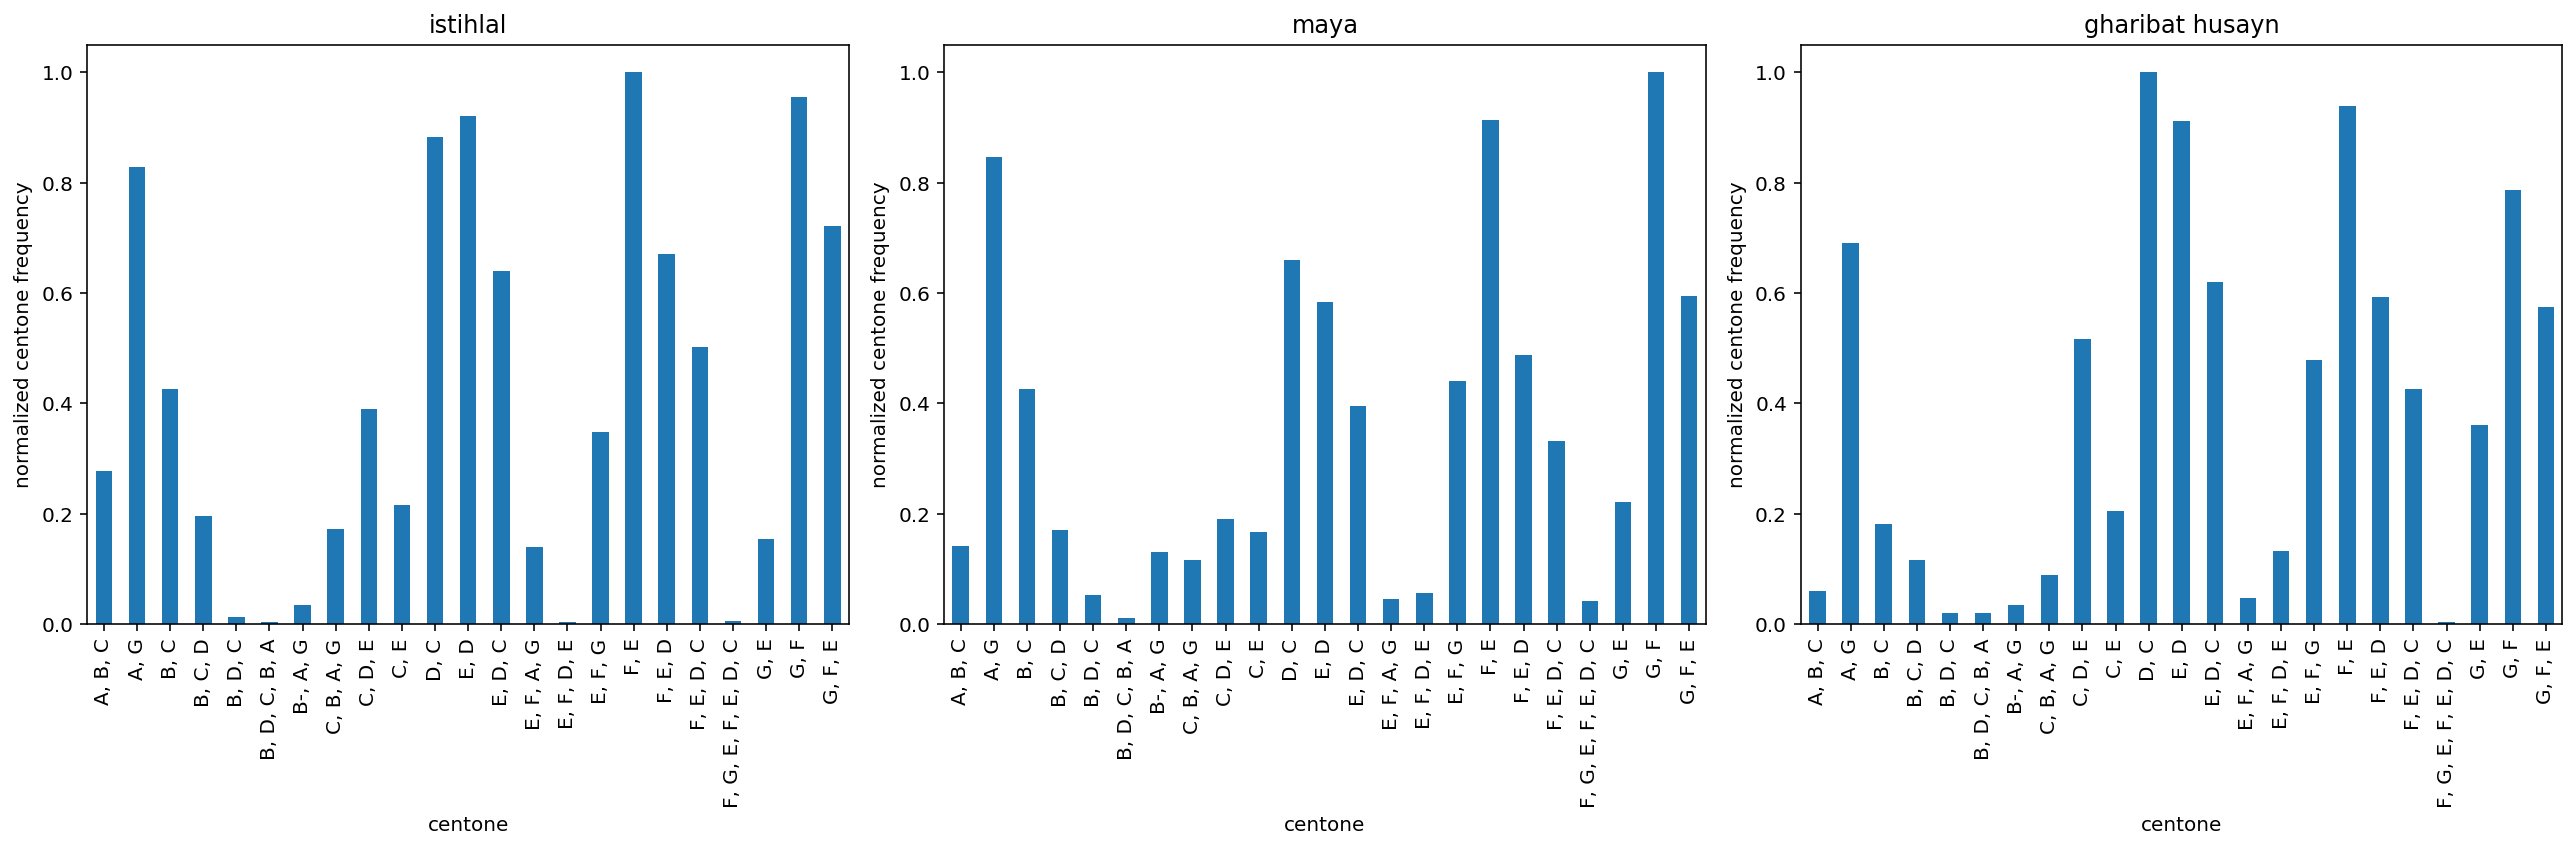

In [233]:
plotDistroSum(countAll,cv)


In [240]:
m =tfidf[relevant_files['tab']=='maya'].mean(axis=0)
i = tfidf[relevant_files['tab']=='istihlal'].mean(axis=0)
g = tfidf[relevant_files['tab']=='gharibat husayn'].mean(axis=0)
marg = m.argsort()[:5]
iarg = i.argsort()[:5]
garg = g.argsort()[:5]
unique_centones[garg].values

array(['F, G, E, F, E, D, C', 'B, D, C', 'B, D, C, B, A', 'B-, A, G',
       'E, F, A, G'], dtype=object)

In [241]:
i[marg]

array([0.00191599, 0.05519521, 0.00525656, 0.0032381 , 0.00102222])

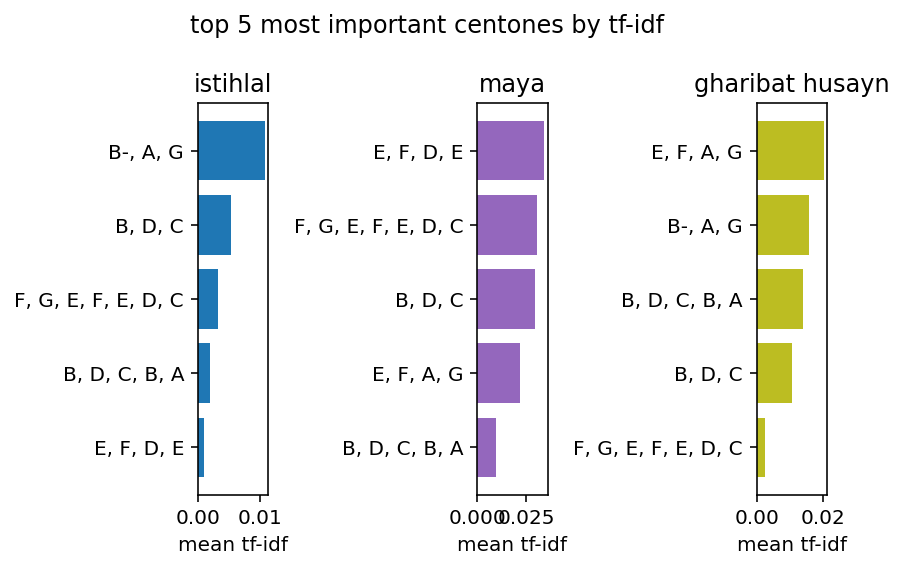

In [242]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.barh(unique_centones[iarg].values,i[iarg], color='tab:blue')
ax1.set_title('istihlal')
ax2.barh(unique_centones[marg].values,m[marg], color='tab:purple')
ax2.set_title('maya')
ax3.barh(unique_centones[garg].values,g[garg], color='tab:olive')
ax3.set_title('gharibat husayn')
fig.suptitle('top 5 most important centones by tf-idf')
ax1.set_xlabel('mean tf-idf')
ax2.set_xlabel('mean tf-idf')
ax3.set_xlabel('mean tf-idf')
fig.tight_layout()
fig.savefig("bottom5.png")